<a href="https://colab.research.google.com/github/vladislavlisin/fake_review_detection/blob/main/feature_engeneering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Start**

## **1.1 IMPORTS**

In [ ]:
# работаем в google colab
# подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch

In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from time import time

In [ ]:
cols = [
    "item_name",
    "date",
    "author",
    "review",
    "rating"
]

## **1.2 WB DATASET**

In [ ]:
path = "/content/drive/MyDrive/diplom/data/general_wb_dataset_v1_100k.csv"
corpus = pd.read_csv(path)

In [ ]:
corpus

,Unnamed: 0.1,item_name,date,author,rating,review,Unnamed: 0
0,0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,5,"Изначально испугалась, потому что нажимаю на в...",0.0
1,1,Apple iPhone 14 6+128GB,2023-12-10,Вера,5,"Пришёл на 2 дня раньше заявленного срока, в об...",1.0
2,2,Apple iPhone 14 6+128GB,2023-12-08,Давид,4,"Телефон оригинальный , не активированный , сму...",2.0
3,3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,5,"Очень боялась заказывать, но решилась. Телефон...",3.0
4,4,Apple iPhone 14 6+128GB,2023-12-04,Александра,5,"Забрала на день раньше,новый,пломбы на месте,б...",4.0
...,...,...,...,...,...,...,...
106579,106579,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-25,Ольга,5,"Первое впечатление хорошее, пришли те что зака...",1982.0
106580,106580,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-02,Ольга,4,"Уверена, что трвар хороший, но знак ""невозврат...",1983.0
106581,106581,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-03-09,Александра,4,"часы очень хорошие,брала не себе,а маме. Ей нр...",1984.0
106582,106582,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-02-27,Сергей,1,"Это пиндец!!!! Искал, выбирал! Выбрал шикарный...",1985.0


In [ ]:
corpus = corpus[cols]
corpus.shape

(106584, 5)

In [ ]:
corpus = corpus.drop_duplicates().reset_index().drop(columns=["index"])
corpus.shape

(80202, 5)

In [ ]:
maps = {1: 1,
        2: 1,
        3: 1,
        4: 0,
        5: 0}

corpus["santiment_ground_truth"] = corpus["rating"].map(maps)

In [ ]:
corpus.to_csv("/content/drive/MyDrive/diplom/data/clean_wb_dataset.csv")

In [ ]:
path = "/content/drive/MyDrive/diplom/data/clean_wb_dataset.csv"
corpus = pd.read_csv(path)

In [ ]:
corpus

,Unnamed: 0,item_name,date,author,review,rating,santiment_ground_truth
0,0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5,0
1,1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5,0
2,2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4,0
3,3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5,0
4,4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5,0
...,...,...,...,...,...,...,...
80197,80197,Men’s & Women’s shop Настольные часы Электронные,2023-07-30,Едил,Будильник не работает. Хотя нужен был именно б...,1,1
80198,80198,Men’s & Women’s shop Настольные часы Электронные,2023-07-21,Ирина,Пользуемся несколько месяцев. Отличные часы. Я...,5,0
80199,80199,Men’s & Women’s shop Настольные часы Электронные,2022-12-06,Петров,Отличные часы.все работает.пришло хорошо все у...,5,0
80200,80200,Men’s & Women’s shop Настольные часы Электронные,2022-11-05,Ольга,"Часы работают, вроде все как хотели, габариты ...",4,0


## **1.3 WOMAN DATASET**

In [ ]:
woman_path = "/content/drive/MyDrive/diplom/data/women-clothing-accessories.3-class.balanced.csv"

In [ ]:
woman_corpus = pd.read_csv(woman_path, sep="\t")

In [ ]:
woman_corpus.sentiment.value_counts()

negative    30000
neautral    30000
positive    30000
Name: sentiment, dtype: int64

In [ ]:
mapping = {
    "negative": 2,
    "neautral": 1,
    "positive": 0
}

woman_corpus.sentiment = woman_corpus.sentiment.map(mapping)

In [ ]:
woman_corpus

,review,sentiment
0,качество плохое пошив ужасный (горловина напер...,1.0
1,"Товар отдали другому человеку, я не получила п...",1.0
2,"Ужасная синтетика! Тонкая, ничего общего с пре...",1.0
3,"товар не пришел, продавец продлил защиту без м...",1.0
4,"Кофточка голая синтетика, носить не возможно.",1.0
...,...,...
89995,сделано достаточно хорошо. на ткани сделан рис...,0.0
89996,Накидка шикарная. Спасибо большое провдо линяе...,0.0
89997,спасибо большое ) продовца рекомендую.. заказа...,0.0
89998,Очень довольна заказом! Меньше месяца в РБ. К...,0.0


In [ ]:
woman_corpus.sentiment.value_counts()

1.0    30000
0.0    30000
Name: sentiment, dtype: int64

## **1.4 Yandex dataset**

### **raw**

In [ ]:
maps_path = "/content/drive/MyDrive/diplom/data/geo-reviews-dataset-2023.tskv"

In [ ]:
# Чтение данных из файла tskv
data = []
with open('/content/drive/MyDrive/diplom/data/geo-reviews-dataset-2023.tskv', 'r') as file:
    for line in file:
        row = {}
        # Разделение строки на пары ключ-значение
        pairs = line.split("	")
        for pair in pairs:
            splits = pair.split("=")
            key = splits[0]
            value = splits[1]
            row[key] = value
        data.append(row)

# Создание pandas dataframe
df = pd.DataFrame(data)

# Вывод dataframe
print(df)

In [ ]:
df.to_csv("/content/drive/MyDrive/diplom/data/yandex_dataset.csv")

### **ready**

In [ ]:
yandex_path = "/content/drive/MyDrive/diplom/data/yandex_dataset.csv"

yandex_ds = pd.read_csv(yandex_path)
yandex_ds

,Unnamed: 0,address,name_ru,rating,rubrics,text
0,0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...
...,...,...,...,...,...,...
499995,499995,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,"Охрана кривая но добрая, двери не закрываются ..."
499996,499996,"Москва, Южный административный округ, район Би...",Бирюлёво-Пассажирская,4.0,Железнодорожная станция,По сравнению со многими современными платформа...
499997,499997,"Новосибирск, Коммунистическая улица, 48А",NaN,5.0,"Бар, паб","Приятная атмосфера, прекрасное вино, волшебная..."
499998,499998,"Астраханская область, Харабалинский район",Сарай-Бату,5.0,Достопримечательность,Был с семьёй 13.06.23 Отличное место. Рекоменд...


# **2. DATA EXPLORATION**

## **2.1 yandex maps**

Проблемы: нет даты и автора

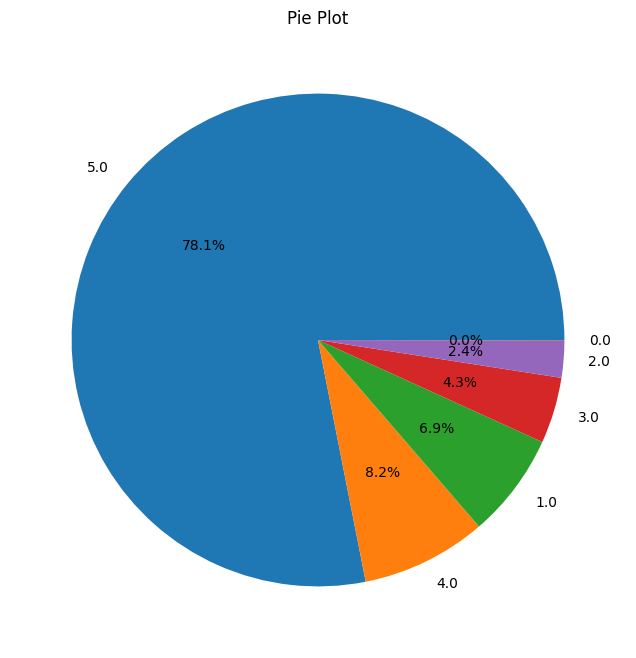

In [ ]:
pos_neg = yandex_ds["rating"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pos_neg.values,
        labels=pos_neg.index,
        autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()

In [ ]:
# нужно запоминать названия товаров иначе пипец дубликатов будет... как бы не хотелось этого избежать
yandex_ds.duplicated().sum()

0

In [ ]:
rating_counts = yandex_ds[yandex_ds["rating"] == 5.0].date.value_counts()

rating_counts

AttributeError: 'DataFrame' object has no attribute 'date'

## **2.2 wildberries**

In [ ]:
corpus

,item_name,date,author,review,rating
0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5
1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5
2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4
3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5
4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5
...,...,...,...,...,...
106579,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-25,Ольга,"Первое впечатление хорошее, пришли те что зака...",5
106580,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-02,Ольга,"Уверена, что трвар хороший, но знак ""невозврат...",4
106581,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-03-09,Александра,"часы очень хорошие,брала не себе,а маме. Ей нр...",4
106582,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-02-27,Сергей,"Это пиндец!!!! Искал, выбирал! Выбрал шикарный...",1


In [ ]:
# нужно запоминать названия товаров иначе пипец дубликатов будет... как бы не хотелось этого избежать
corpus.duplicated().sum()

26382

In [ ]:
rating_counts = corpus.groupby(["date"])['rating'].value_counts().sort_index()

rating_counts

date        rating
2015-12-19  1           1
2016-02-03  5           1
2017-11-15  5           1
2017-11-23  5           1
2017-12-11  5           1
                     ... 
2023-12-11  1          21
            2           7
            3          16
            4          35
            5         187
Name: rating, Length: 4232, dtype: int64

In [ ]:
# сколько вообще продуктов

corpus.item_name.value_counts().iloc[lambda x: x.values>1].index

Index(['UZcotton Футболка хлопок однотонная Премиум большие размеры',
       'ТЕЛОДВИЖЕНИЯ Футболка оверсайз',
       'Ticle Футболка мужская оверсайз хлопок однотонная',
       'Annemore Футболка базовая хлопковая',
       'Varo Футболка хлопок набор 3 шт',
       'GOLDUSTIM Футболка оверсайз однотонная базовая хлопок',
       'Ticle Футболка оверсайз',
       'ТЫСЯЧА СТОЛИЦ Кофта с длинным рукавом оверсайз',
       'HappyFox Футболка базовая однотонная хлопок',
       'UZcotton Футболка классическая хлопок однотонная большие размеры',
       ...
       'EventBox Конфетти для шаров и коробок розово-голубой микс 1см, 50гр.',
       'Страна Карнавалия Наполнитель для шара конфетти',
       'sakvobox.ru Подарочная коробка для цветов круглая',
       'LucyMi Конфетти для праздника цветные 1см 20гр',
       'EventBox Конфетти для шаров и коробок круг 1см',
       'Страна Карнавалия Наполнитель для воздушных шаров конфетти шестиугольник',
       'Страна Карнавалия Конфетти для праздника для

In [ ]:
from matplotlib import pyplot as plt

print(corpus.date.min(), corpus.date.max())

2015-12-19 2023-12-11


In [ ]:
# посмотрим как там распределяются длины текстов по словам

seq_len = [len(str(i).split(" ")) for i in clear_corp['review']]
pd.Series(seq_len).hist(bins = 100, figsize=(15,5))

<Axes: >

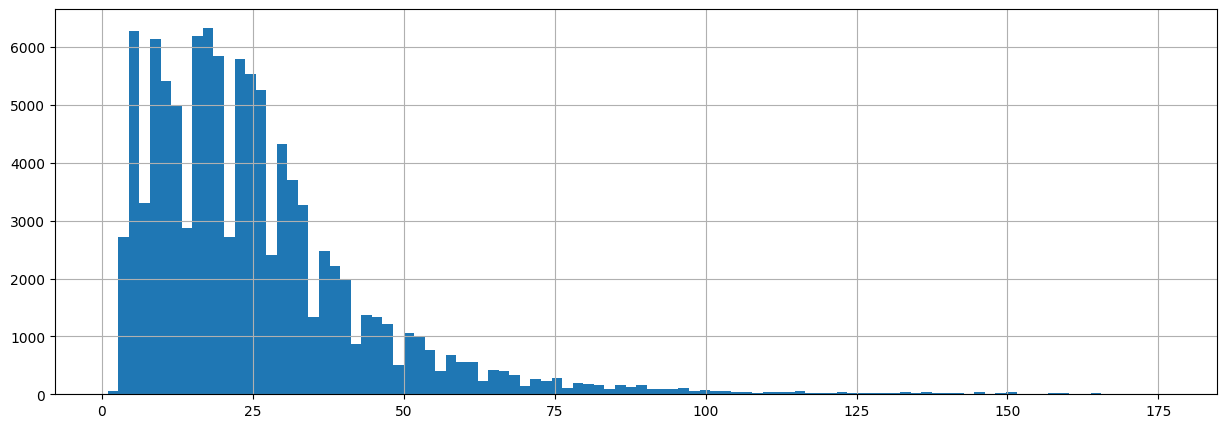

In [ ]:
# посмотрим как там распределяются длины текстов по словам

seq_len = [len(str(i).split(" ")) for i in corpus['review']]
pd.Series(seq_len).hist(bins = 100, figsize=(15,5))

<Axes: >

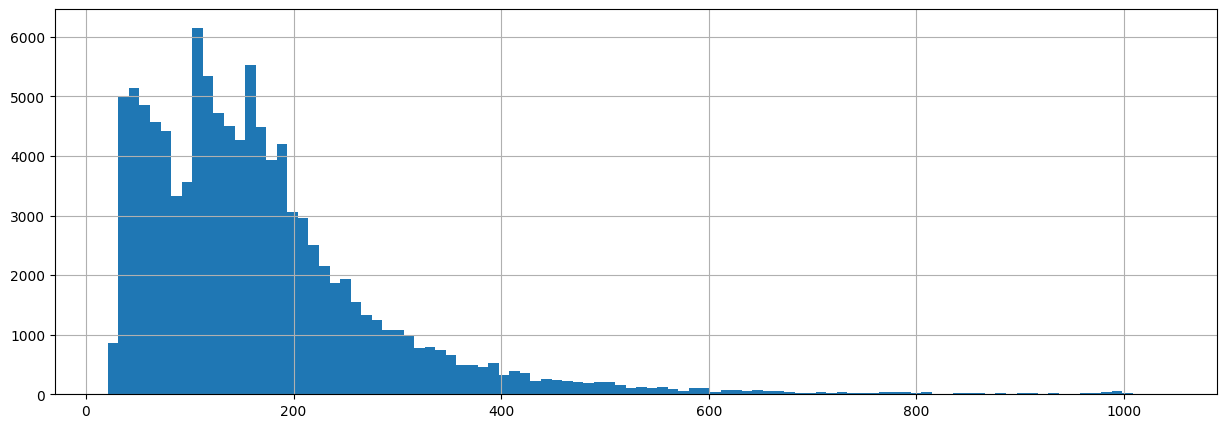

In [ ]:
# посмотрим как там распределяются длины текстов по символам

seq_len = [len(str(i)) for i in corpus['review']]
pd.Series(seq_len).hist(bins = 100, figsize=(15,5))

In [ ]:
corpus.author.value_counts()

Елена                     5757
Покупатель Wildberries    4748
Ольга                     4615
Наталья                   4552
Татьяна                   4517
                          ... 
Кадз                         1
Мегапон                      1
Урсула                       1
Ким Сону                     1
Едил                         1
Name: author, Length: 3385, dtype: int64

In [ ]:
# можнос cделать словарь

names_count = corpus.author.value_counts().to_dict()
names_count

{'Елена': 5757,
 'Покупатель Wildberries': 4748,
 'Ольга': 4615,
 'Наталья': 4552,
 'Татьяна': 4517,
 'Екатерина': 4109,
 'Юлия': 3918,
 'Ирина': 3828,
 'Анастасия': 3680,
 'Анна': 3521,
 'Светлана': 3068,
 'Мария': 2531,
 'Марина': 2494,
 'Виктория': 1899,
 'Дарья': 1744,
 'Оксана': 1622,
 'Надежда': 1426,
 'Ксения': 1363,
 'Евгения': 1258,
 'Людмила': 1223,
 'Александра': 1211,
 'Галина': 1109,
 'Кристина': 1067,
 'Алина': 1017,
 'Александр': 953,
 'Сергей': 858,
 'Валерия': 762,
 'Олеся': 759,
 'Любовь': 750,
 'Яна': 745,
 'Дмитрий': 724,
 'Наталия': 719,
 'Полина': 668,
 'Елизавета': 650,
 'Валентина': 647,
 'Лариса': 636,
 'Алексей': 628,
 'Диана': 572,
 'Алена': 572,
 'Алёна': 546,
 'Вера': 530,
 'Маргарита': 522,
 'Андрей': 501,
 'Инна': 487,
 'Лилия': 438,
 'Вероника': 430,
 'Владимир': 386,
 'Нина': 365,
 'Евгений': 353,
 'Ангелина': 329,
 'Максим': 303,
 'Алла': 301,
 'Михаил': 299,
 'Арина': 290,
 'Роман': 290,
 'Софья': 280,
 'Денис': 276,
 'Карина': 273,
 'Игорь': 266,
 'Л

In [ ]:
mapping = {
    1: 1,
    2: 1,
    3: 1,
    4: 0,
    5: 0
}

corpus["sentiment"] = corpus.rating.map(mapping)

<ipython-input-28-ffc92b336c88>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["sentiment"] = corpus.rating.map(mapping)


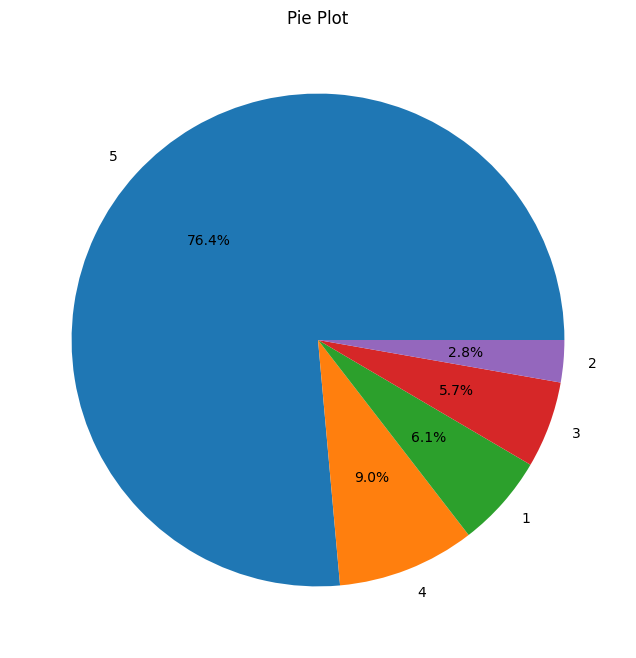

In [ ]:
pos_neg = corpus["rating"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pos_neg.values, labels=pos_neg.index, autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()

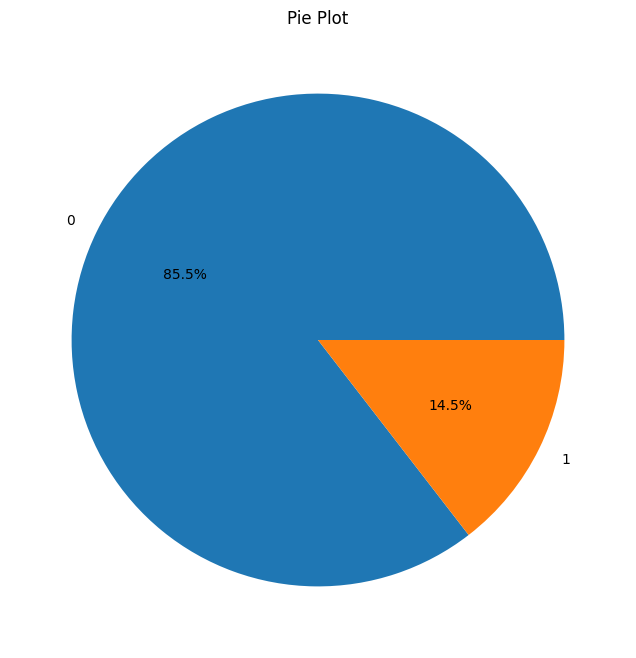

In [ ]:
# Построение круговой диаграммы
pos_neg = corpus["sentiment"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pos_neg.values, labels=pos_neg.index, autopct='%1.1f%%')
plt.title('Pie Plot')
plt.show()

In [ ]:
corpus[134:]

,item_name,date,author,review,rating
134,Apple iPhone 11 256GB Черный,2023-10-13,Алина,"Здравствуйте) Очень переживала за товар, так к...",5
135,Apple iPhone 11 256GB Черный,2023-10-12,Николай,"Пришел телефон с дефектом, внешне вгдядит как ...",1
136,Apple iPhone 11 256GB Черный,2023-10-09,Ольга,Добрый день. Телефон пришел целый. Хорошо упак...,1
137,Apple iPhone 11 256GB Черный,2023-10-07,Юлия,"Телефон пришел хорошо упакован, целый в компле...",5
138,Apple iPhone 11 256GB Черный,2023-10-07,Марина,"Оформила возврат сразу в пункте выдачи, это пр...",1
...,...,...,...,...,...
106579,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-25,Ольга,"Первое впечатление хорошее, пришли те что зака...",5
106580,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-05-02,Ольга,"Уверена, что трвар хороший, но знак ""невозврат...",4
106581,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-03-09,Александра,"часы очень хорошие,брала не себе,а маме. Ей нр...",4
106582,Perfeo LED часы-будильник LUMINOUS 2 (электрон...,2022-02-27,Сергей,"Это пиндец!!!! Искал, выбирал! Выбрал шикарный...",1


# **3. START PREPROCESS**

In [ ]:
# for yandex

#yandex_ds = yandex_ds.assign(item_name=lambda x: yandex_ds.name_ru + " " + yandex_ds.rubrics)
#yandex_ds = yandex_ds.rename({"text": "review"})
#y_cols = ["review, item_name", "rating"]

#corpus = yandex_ds[y_cols]

In [ ]:
# for WB

corpus

,item_name,date,author,review,rating
0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5
1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5
2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4
3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5
4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5
...,...,...,...,...,...
80197,Men’s & Women’s shop Настольные часы Электронные,2023-07-30,Едил,Будильник не работает. Хотя нужен был именно б...,1
80198,Men’s & Women’s shop Настольные часы Электронные,2023-07-21,Ирина,Пользуемся несколько месяцев. Отличные часы. Я...,5
80199,Men’s & Women’s shop Настольные часы Электронные,2022-12-06,Петров,Отличные часы.все работает.пришло хорошо все у...,5
80200,Men’s & Women’s shop Настольные часы Электронные,2022-11-05,Ольга,"Часы работают, вроде все как хотели, габариты ...",4


## **3.1 Stat and simple features+**

In [ ]:
# this dont work for some reason
#!pip install pyspellchecker

In [ ]:
!python -m pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.1 MB/s eta 0:00:00


In [ ]:
!pip install language_tool_python

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import language_tool_python

tool = language_tool_python.LanguageTool('ru-RU')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpm9mhpfkx.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


In [ ]:
# пишем функции таким образом, чтобы можно было по одному текст обрабатывать,
# потому что на инференсе отзывы обрабатываются по одному

def symbol_length(one_text: str) -> int:
  symbol_len = len(one_text)
  return symbol_len

def word_length(one_text: str) -> int:
  word_len = len(one_text.split(" "))
  return word_len

def average_word_length(one_text: str) -> float:
  symbol_len = len(one_text)
  word_len = len(one_text.split(" "))
  return symbol_len / word_len

def count_sentences(one_text: str) -> int:
    sentences = sent_tokenize(one_text)
    return len(sentences)

def average_sent_len(one_text: str) -> float:
    sent_len = count_sentences(one_text)
    word_len = word_length(one_text)
    return word_len / sent_len

def digit_part(one_text: str) -> float:
    digit_count = 0
    other_count = 0

    for char in one_text:
        if char.isdigit():
            digit_count += 1
        else:
            other_count += 1

    return digit_count / other_count

def caps_rate(one_text: str) -> float:
  sent_len = count_sentences(one_text)

  count = 0
  for letter in one_text:
      if letter.isupper():
          count += 1

  return count / sent_len

def uniq_rate(one_text: str) -> float:
  uniq_words = len(set(one_text.split()))
  all_words = len(one_text.split())
  return uniq_words / all_words

def flash_index(one_text: str) -> float:
  ASL = word_length(one_text) / count_sentences(one_text)
  ASW = symbol_length(one_text) / word_length(one_text)
  # адаптация для русского языка
  FRE = 206.835 - 1.52*ASL - 65.14*ASW
  return FRE

chars_to_ignore = "йцукенгшщзхъфывапролджэячсмитёьбюzxcvbnmasdfghjklqwertyuiop1234567890"
signs_to_ignore = "%/\':;?!,.?<>=+-_*&^$#(){}[]|№ "
ignore = chars_to_ignore + signs_to_ignore

def strange_sybmols_count(text_one : str) -> int:
  text_temp = "".join([ch for ch in text_one if ch not in ignore])
  return len(text_temp)

# Можно подумать об умном бин разбиении и вое преобразовании, так как имена разные и их много
# данная фича конкретно для WB пока что
def is_anonymus(one_author: str) -> int:
  if one_author == "Покупатель Wildberries":
    return 1
  else:
    return 0

# выводит количество слов с ошибками
def check_grammar(one_text: str) -> int:
  matches = tool.check(one_text)
  return len(matches)

markers = [
    "никогда",
    "только",
    "самый",
    "самые",
    "лучший",
    "очень",
    "невероятно",
    "быстро",
    "выгодно",
    "рекомендую"
]

def find_markers(one_test: str) -> int:
  for i in one_test.split():
    if i in markers:
      return 1
  return 0

In [ ]:
stat_features = [
    "symbol_length",
    "word_length",
    "average_word_length",
    "count_sentences",
    "average_sent_len",
    "digit_part",
    "caps_rate",
    "uniq_rate",
    "flash_index",
    "strange_sybmols_count",
    "is_anonymus",
    "check_grammar",
    "find_markers"
]

stat_ds = pd.DataFrame(columns=stat_features)

In [ ]:
%%time
# 13 признаков
stat_ds.symbol_length = corpus.review.apply(symbol_length)
stat_ds.word_length = corpus.review.apply(word_length)
stat_ds.average_word_length = corpus.review.apply(average_word_length)
print(1)
stat_ds.count_sentences = corpus.review.apply(count_sentences)
stat_ds.average_sent_len = corpus.review.apply(average_sent_len)
stat_ds.digit_part = corpus.review.apply(digit_part)
print(2)
stat_ds.caps_rate = corpus.review.apply(caps_rate)
stat_ds.uniq_rate = corpus.review.apply(uniq_rate)
stat_ds.flash_index = corpus.review.apply(flash_index)
print(3)
stat_ds.strange_sybmols_count = corpus.review.apply(strange_sybmols_count)
print(4)
stat_ds.is_anonymus = corpus.review.apply(is_anonymus)
print(5)
stat_ds.check_grammar = corpus.review.apply(check_grammar)
print(6)
stat_ds.find_markers = corpus.review.apply(find_markers)

1
2
3
4
5
6
CPU times: user 5min 1s, sys: 17.6 s, total: 5min 18s
Wall time: 43min 3s


In [ ]:
stat_ds.to_csv("/content/drive/MyDrive/diplom/data/stat_ds.csv")

In [ ]:
stat_ds = pd.read_csv("/content/drive/MyDrive/diplom/data/stat_ds.csv")
stat_ds

,Unnamed: 0,symbol_length,word_length,average_word_length,count_sentences,average_sent_len,digit_part,caps_rate,uniq_rate,flash_index,strange_sybmols_count,is_anonymus,check_grammar,find_markers
0,0,269,37,7.270270,1,37.000000,0.018939,1.0,0.918919,-322.990405,3,0,2,0
1,1,174,28,6.214286,3,9.333333,0.005780,1.0,0.928571,-212.150238,3,0,1,0
2,2,150,27,5.555556,1,27.000000,0.000000,5.0,0.814815,-196.093889,5,0,4,1
3,3,265,39,6.794872,5,7.800000,0.003788,1.8,0.897436,-247.638949,9,0,0,0
4,4,303,37,8.189189,2,18.500000,0.000000,3.5,0.918919,-354.728784,7,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80197,80197,132,23,5.739130,4,5.750000,0.000000,1.0,0.913043,-175.751957,4,0,0,0
80198,80198,224,29,7.724138,6,4.833333,0.000000,1.0,0.965517,-303.662011,6,0,1,0
80199,80199,201,30,6.700000,1,30.000000,0.000000,1.0,0.933333,-275.203000,1,0,9,0
80200,80200,221,38,5.815789,2,19.000000,0.000000,1.0,0.894737,-200.885526,2,0,0,0


In [ ]:
stat_ds["find_markers"].value_counts()

0    57897
1    22305
Name: find_markers, dtype: int64

## **3.2 Abstract features**

### **in product Similarity measure, slided with 1 month data period +**

In [ ]:
# признак внутри одного продукта - насколько отзыв поход на другие внутри одного продукта.
# признак может указывать на то, что один и тот же человек написал положительный отзвы с разных аккаунтов

from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# длина текстов до 400 символов, основа
# основная доля до 125 слов-токенов

# token is a word not a symbol

# 712 - word emb - xlmbert - max seq len 128
# https://huggingface.co/sentence-transformers/paraphrase-multilingual-mpnet-base-v2

# 384 - word emb - bert - max seq len 128
# https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

In [ ]:
#model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(250037, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
corpus["date"] = corpus["date"].apply(pd.to_datetime)
#corpus["date"]

0       2023-12-11
1       2023-12-10
2       2023-12-08
3       2023-12-08
4       2023-12-04
           ...    
80197   2023-07-30
80198   2023-07-21
80199   2022-12-06
80200   2022-11-05
80201   2022-09-06
Name: date, Length: 80202, dtype: datetime64[ns]

In [ ]:
corpus.item_name.value_counts().iloc[lambda x: x.values > 2]

GOLDUSTIM Футболка оверсайз однотонная базовая хлопок               983
Annemore Футболка базовая хлопковая                                 972
Ticle Футболка оверсайз                                             968
UZcotton Футболка классическая хлопок однотонная большие размеры    965
Ticle Футболка оверсайз хлопок однотонная                           963
                                                                   ... 
NAM+ Шарф зимний кашемировый палантин                                 3
COLUMBO Компас Адрианова военный                                      3
Epson L132 Принтер струйный L132 для фото СНПЧ А4                     3
Fashion Miss Шарф женский из кашемира осенний однотонный              3
OWIS Шарф зимний объемный                                             3
Name: item_name, Length: 1203, dtype: int64

In [ ]:
# ОЧЕНЬ громоздкие вычисления

series = corpus.item_name.value_counts().iloc[lambda x: x.values > 2]
series = series.sample(frac=1, random_state=1)

# Разделяем на 5 частей
split = len(series) // 5
splitseries = [series[i:i + split] for i in range(0, len(series), split)]

In [ ]:
# максимальное количество векторов единоразово не больше 1000 - подъемно

import sys
from numpy import dot
from numpy.linalg import norm
import gc
from torch import cat
from torch import tensor
# collector

def go_to_0_1(x):
  return (x + 1)/2

def make_sim(part):

  similarity = pd.read_csv("/content/drive/MyDrive/diplom/data/sim_feach_ds.csv")
  index_2 = part.index
  for prod in index_2:

    temp = corpus.loc[corpus["item_name"] == prod]
    print("items number: ", len(temp), prod)
    # к сожалению, за раз не получается токенизировать все предложения
    # (негде хранить такой объем данных)
    temp_index = list(temp.index)
    ken_index = len(temp_index)

    sentence_embeddings = tensor(data=[])
    if ken_index > 300:
      start = time()
      # Разделяем на 4 части
      split = ken_index // 3
      splits = [temp[i:i + split]["review"] for i in range(0, ken_index, split)]
      for k in splits:
        encoded_input = tokenizer(list(k),
                                  padding=True,
                                  runcation=True,
                                  return_tensors='pt')
        with torch.no_grad():
          model_output = model(**encoded_input)
        sentence_embeddings = cat([sentence_embeddings, mean_pooling(model_output, encoded_input['attention_mask'])], 0)
      print((time() - start) / 60)
    else:
      sentences = list(temp["review"])
      encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
      with torch.no_grad():
          model_output = model(**encoded_input)
      sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    dicty = dict(zip(temp_index, np.arange(0, len(sentence_embeddings))))

    for _, row in temp.iterrows():
      # теперь нужно ещё и по времени разделить записи, делаем срезы
      # нужно понимать что мы должны смотреть на месяц вперёд и на месяц назад относительно конкретной записи
      ld = row.date + pd.offsets.MonthEnd(-1)
      ud = row.date + pd.offsets.MonthEnd(1)
      sentences_index = temp[(temp["date"] <= ud) & (temp["date"] > ld)].index

      # если за месяц всего 1 отзыв, то пропускаем
      if len(sentences_index) == 1:
        continue

      convert_idx = [dicty[i] for i in sentences_index]

      present_sent = sentence_embeddings[dicty[_]]
      result = 0
      counter = 0
      for k in sentence_embeddings[convert_idx]:

        # приводим от [-1,1] к [0,1], делаем отсечку для 0.6
        prob = go_to_0_1(dot(present_sent, k) / (norm(present_sent) * norm(k)))
        if prob > 0.6:
          counter = counter + 1
        result = result + prob
      # вычитаем диагональный элемент 1, и делим на количество сравнений
      # нам важно в среднем насколько отзыв похож на другие
      coef = result / len(sentence_embeddings)
      similarity.loc[_, "sim_stealth"] = counter
      similarity.loc[_, "sim_counter"] = coef

    del encoded_input
    del model_output
    del sentence_embeddings
    gc.collect()

  similarity.to_csv("/content/drive/MyDrive/diplom/data/sim_feach_ds.csv")

In [ ]:
# ставим "похожесть" на нуль инициализация

similarity = pd.DataFrame({"data": corpus["date"]})
similarity = similarity.assign(sim_feach=0)
similarity.to_csv("/content/drive/MyDrive/diplom/data/sim_feach_ds.csv")

In [ ]:
%%time

for i in splitseries:
  similarity = pd.read_csv("/content/drive/MyDrive/diplom/data/sim_feach_ds.csv")
  print("products number: ", len(i))
  make_sim(i)
  print("\n")
  print("end1! ------------------------------------------------")

products number:  240
items number:  17 МобиЛарк Часы говорящие электронные
items number:  18 MINA KIDS Куртка длинная зимняя
items number:  4 СИБШАР Конфетти для праздника и шаров розовое золото 1 см 100г
items number:  5 99Colorspace Шапка и шарф комплект осенний зимний теплый набор
items number:  10 THE NORTH FACE Двухсторонняя куртка
items number:  5 МЕДПАК Тальк для депиляции и шугаринга для ног тела маникюра ногтей
items number:  15 KNIFE MARKET Очки спортивные тактические Oakley Daisy
items number:  16 GIFT LAND Елка искусственная/Новогодняя с шишками
items number:  14 ИНФОФАРМ Присыпка с календулой
items number:  15 Mermaze Mermaidz Кукла русалка мермазе зимняя серия Gwen
items number:  3 paper man Конфетти металлизированное фольгированное мультиколор 1 кг
items number:  63 S&V collection Часы кварцевые скелетоны с золотым циферблатом
items number:  3 Mini market Тальк для тела Love Nature Oriflame
items number:  31 Apple iPhone 14 6+128GB
items number:  34 Rakku Кофта вязаная 

In [ ]:
similarity = pd.read_csv("/content/drive/MyDrive/diplom/data/sim_feach_ds.csv")
similarity

In [ ]:
similarity[similarity["sim_feach"] > 0.6]

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,data,sim_feach
1699,1699,1699,1699,1699,1699,1699,1699,2023-11-30,0.804942
4004,4004,4004,4004,4004,4004,4004,4004,2023-10-31,0.703541
4213,4213,4213,4213,4213,4213,4213,4213,2023-12-10,0.742575
4214,4214,4214,4214,4214,4214,4214,4214,2023-12-10,0.735582
4215,4215,4215,4215,4215,4215,4215,4215,2023-12-09,0.676696
...,...,...,...,...,...,...,...,...,...
78032,78032,78032,78032,78032,78032,78032,78032,2023-12-07,0.608044
78308,78308,78308,78308,78308,78308,78308,78308,2023-11-30,0.651025
78677,78677,78677,78677,78677,78677,78677,78677,2023-06-18,0.659255
78678,78678,78678,78678,78678,78678,78678,78678,2023-06-16,0.636847


### **data feature+**

In [ ]:
corpus["date"] = corpus["date"].apply(pd.to_datetime)
corpus["date"]

0       2023-12-11
1       2023-12-10
2       2023-12-08
3       2023-12-08
4       2023-12-04
           ...    
80197   2023-07-30
80198   2023-07-21
80199   2022-12-06
80200   2022-11-05
80201   2022-09-06
Name: date, Length: 80202, dtype: datetime64[ns]

In [ ]:
def segm(x, q1, q2):

  if x < q1:
    return 0
  elif x > q2:
    return 2
  else:
    return 1

index_3 = corpus.item_name.value_counts().index

# ставим "похожесть" на нуль инициализация
date_segm_ds = pd.DataFrame({"Data": corpus["date"]})
date_segm_ds = date_segm_ds.assign(date_segm=0)

print("different products count: ", len(index_3))

# потом нужнор будет добавить ещё и временное окно, так как бывает слишком много товаров
for prod in tqdm(index_3[::-1]):

  # row - наши продукты
  temp_index = corpus.loc[corpus["item_name"] == prod].index

  q1 = corpus.loc[temp_index, "date"].quantile(0.33)
  q2 = corpus.loc[temp_index, "date"].quantile(0.66)

  date_segm_ds.loc[temp_index, "date_segm"] = [segm(x, q1, q2) for x in corpus.loc[temp_index, "date"]]

different products count:  1329


100%|██████████| 1329/1329 [00:22<00:00, 59.08it/s]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(
                    #drop="first"
                    )

data_new = enc.fit_transform(date_segm_ds["date_segm"].values.reshape(-1, 1))
date_ds = pd.DataFrame(data_new.toarray(),
                      columns=[f"date_segm_{i}" for i in enc.categories_[0]])

In [ ]:
date_ds.to_csv("/content/drive/MyDrive/diplom/data/date_ds.csv")

In [ ]:
date_ds = pd.read_csv("/content/drive/MyDrive/diplom/data/date_ds.csv")
date_ds

,Unnamed: 0,date_segm_0,date_segm_1,date_segm_2
0,0,0.0,0.0,1.0
1,1,0.0,0.0,1.0
2,2,0.0,0.0,1.0
3,3,0.0,0.0,1.0
4,4,0.0,0.0,1.0
...,...,...,...,...
80197,80197,1.0,0.0,0.0
80198,80198,1.0,0.0,0.0
80199,80199,1.0,0.0,0.0
80200,80200,1.0,0.0,0.0


In [ ]:
date_ds.date_segm_0.value_counts()

0.0    54015
1.0    26187
Name: date_segm_0, dtype: int64

### **Prod_title_review_closeness+**

In [ ]:
# принцип тот же что и в сходстве отзывов, но тут чем они более похожи
# тем лучше

from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import torch

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
start = time()

closness = pd.DataFrame({'data': corpus["date"]})
closness = closness.assign(prod_title_sim=0)

for _, row in tqdm(corpus.iterrows()):

  sentences = [row.item_name, row.review]
  encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

  # Compute token embeddings
  with torch.no_grad():
    model_output = model(**encoded_input)

  # Perform pooling. In this case, average pooling
  sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
  res = cosine_similarity(sentence_embeddings)

  closness.loc[_, "prod_title_sim"] = res[0,1]

print(time() - start)

80202it [1:55:20, 11.59it/s]

6920.2352414131165


In [ ]:
closness.to_csv("/content/drive/MyDrive/diplom/data/closness_ds.csv")

In [ ]:
closness = pd.read_csv("/content/drive/MyDrive/diplom/data/closness_ds.csv")
closness

,Unnamed: 0,prod_title_sim
0,0,0.203960
1,1,0.205652
2,2,0.315342
3,3,0.227825
4,4,0.050046
...,...,...
80197,80197,0.242237
80198,80198,0.304455
80199,80199,0.302449
80200,80200,0.344631


### **Santiment Measure+**

In [ ]:
import torch

cuda = torch.device('cuda')
cuda

device(type='cuda')

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)

# Labels
# 0: NEUTRAL
# 1: POSITIVE
# 2: NEGATIVE

In [ ]:
# после того как получили все сантименты
def abs_min_max_all(score, minn, maxx):

      feach = abs((2*score - minn - maxx)/(minn + maxx))
      return feach

In [ ]:
santiment_measure = pd.DataFrame({'data': corpus["date"], "rating": corpus["rating"]})
santiment_measure = santiment_measure.assign(santiment_measure=0)

In [ ]:
# на ГПУ
def predict_one(text):
    global counter
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    #predicted = torch.argmax(predicted, dim=1).numpy()
    neu = predicted[0][0] / 2
    pos = predicted[0][1] + neu
    neg = predicted[0][2] + neu
    counter += 1
    if counter % 1000 == 0:
      print(counter)
    return float(pos)

In [ ]:
# всё работает, но медленно - ОЧЕНЬ ДОЛГО!!!
start = time()
counter = 0
santiment_measure["santiment_prob"] = corpus["review"].apply(predict_one)
end = time()
print(end - start)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
18918.495673656464


In [ ]:
santiment_measure["santiment_prob"]

0        0.972943
1        0.941776
2        0.765527
3        0.988729
4        0.986828
           ...   
80197    0.158182
80198    0.560159
80199    0.158176
80200    0.715237
80201    0.980459
Name: santiment_prob, Length: 80202, dtype: float64

In [ ]:
minn = santiment_measure["santiment_prob"].min()
maxx = santiment_measure["santiment_prob"].max()
print(minn, maxx)

0.0036277882754802 0.9937325716018676


In [ ]:
santiment_measure["santiment_measure"] = santiment_measure["santiment_prob"].apply(lambda x: abs_min_max_all(x, minn, maxx))

In [ ]:
santiment_measure.to_csv("/content/drive/MyDrive/diplom/data/santiment_measure_ds.csv")

### **santiment consistency+**

In [ ]:
santiment_measure = pd.read_csv("/content/drive/MyDrive/diplom/data/santiment_measure_ds.csv")
santiment_measure

,Unnamed: 0.1,Unnamed: 0,data,rating,santiment_measure,santiment_prob
0,0,0,2023-12-11,5,0.951035,0.972943
1,1,1,2023-12-10,5,0.888537,0.941776
2,2,2,2023-12-08,4,0.535106,0.765527
3,3,3,2023-12-08,5,0.982693,0.988729
4,4,4,2023-12-04,5,0.978879,0.986828
...,...,...,...,...,...,...
80197,80197,80197,2023-07-30,1,0.682798,0.158182
80198,80198,80198,2023-07-21,5,0.123282,0.560159
80199,80199,80199,2022-12-06,5,0.682810,0.158176
80200,80200,80200,2022-11-05,4,0.434260,0.715237


In [ ]:
# positive = 0
# negative = 1
def cut_prob(x):
  if x < 0.5:
    return 1
  else:
    return 0

santiment_measure["santiment_predict"] = santiment_measure["santiment_prob"].apply(cut_prob)

In [ ]:
maps = {1: 1,
        2: 1,
        3: 1,
        4: 0,
        5: 0}

santiment_measure["santiment_ground_truth"] = santiment_measure["rating"].map(maps)

In [ ]:
# если совпали, значит 0, иначе есть несогласованность, ставим метку 1

santiment_measure["santi_cons"] = [0 if i == j else 1 for i, j in
                        zip(santiment_measure["santiment_ground_truth"], santiment_measure["santiment_predict"])]
santiment_measure["santi_cons"].value_counts()

0    69893
1    10309
Name: santi_cons, dtype: int64

In [ ]:
santiment_measure

,Unnamed: 0.1,Unnamed: 0,data,rating,santiment_measure,santiment_prob,santiment_predict,santiment_ground_truth,santi_cons
0,0,0,2023-12-11,5,0.951035,0.972943,0,0,0
1,1,1,2023-12-10,5,0.888537,0.941776,0,0,0
2,2,2,2023-12-08,4,0.535106,0.765527,0,0,0
3,3,3,2023-12-08,5,0.982693,0.988729,0,0,0
4,4,4,2023-12-04,5,0.978879,0.986828,0,0,0
...,...,...,...,...,...,...,...,...,...
80197,80197,80197,2023-07-30,1,0.682798,0.158182,1,1,0
80198,80198,80198,2023-07-21,5,0.123282,0.560159,0,0,0
80199,80199,80199,2022-12-06,5,0.682810,0.158176,1,0,1
80200,80200,80200,2022-11-05,4,0.434260,0.715237,0,0,0


In [ ]:
santiment_measure.to_csv("/content/drive/MyDrive/diplom/data/santiment_measure_ds.csv")

In [ ]:
santiment_measure = pd.read_csv("/content/drive/MyDrive/diplom/data/santiment_measure_ds.csv")
santiment_measure

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,data,rating,santiment_measure,santiment_prob,santiment_predict,santiment_ground_truth,santi_cons
0,0,0,0,2023-12-11,5,0.951035,0.972943,0,0,0
1,1,1,1,2023-12-10,5,0.888537,0.941776,0,0,0
2,2,2,2,2023-12-08,4,0.535106,0.765527,0,0,0
3,3,3,3,2023-12-08,5,0.982693,0.988729,0,0,0
4,4,4,4,2023-12-04,5,0.978879,0.986828,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80197,80197,80197,80197,2023-07-30,1,0.682798,0.158182,1,1,0
80198,80198,80198,80198,2023-07-21,5,0.123282,0.560159,0,0,0
80199,80199,80199,80199,2022-12-06,5,0.682810,0.158176,1,0,1
80200,80200,80200,80200,2022-11-05,4,0.434260,0.715237,0,0,0


### **find sospecious +**

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/709M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
ner_count_ds = pd.DataFrame({'data': corpus["date"]})
ner_count_ds = ner_count_ds.assign(ner_els_count=0)

In [ ]:
%%time
counter = 1

def ner_find(x):
  global counter
  ner_results = nlp(x)
  counter += 1
  if counter % 1000 == 0:
    print(counter)
  return len(ner_results)

ner_count_ds["ner_els_count"] = corpus["review"].apply(ner_find)

KeyboardInterrupt: 

In [ ]:
ner_count_ds.to_csv("/content/drive/MyDrive/diplom/data/ner_count_ds.csv")

In [ ]:
ner_count_ds = pd.read_csv("/content/drive/MyDrive/diplom/data/ner_count_ds.csv")
ner_count_ds

### **Zipf score+**

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 70.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=3c0842a54c93f08e3f1e897f7c93f5592e630373b80f8301f9844d0eb5a1b569
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
from pymorphy2 import MorphAnalyzer
import re
morph = MorphAnalyzer()

# наиболее предпочтительный
def lemmatize(one_text: str) -> str:
    string = []
    for word in one_text.split():
        string.append(morph.normal_forms(word)[0])
    return string

chars_to_ignore = "йцукенгшщзхъфывапролджэячсмитёьбюzxcvbnmasdfghjklqwertyuiop1234567890"

# оставляем те символы что есть в игноре
def replace_characters(one_text: str):
    pattern = f'[^{" ".join(map(re.escape, chars_to_ignore))}]'
    return re.sub(pattern, '', one_text.lower())

In [ ]:
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# закон ципфа word_freq = (1 / rank_freq)
# на первом месте стоит слово freq = n
# значит на втором месте стоит слово freq n / 2, следующее n/3 и так далее

def rank_array(arr):
    ranked_arr = [0] * len(arr)
    rank = 1

    for i in sorted(range(len(arr)), key=lambda x: arr[x], reverse=True):
        if ranked_arr[i] == 0:
            ranked_arr[i] = rank
            for j in range(i+1, len(arr)):
                if arr[j] == arr[i]:
                    ranked_arr[j] = rank
            rank += 1

    return ranked_arr

def zipf_score(text):

    words = lemmatize(replace_characters(text))
    word_freq = Counter(words)
    freq = [item[1] for item in sorted(word_freq.items(), key=lambda kv: kv[1], reverse=True)]
    order = [item+1 for item in range(len(sorted(word_freq.items(), key=lambda kv: kv[1], reverse=True)))]
    # rank = rank_array(freq)
    if freq:
      high = freq[0]
    else:
      return 0
    ideal_curve = [high / i for i in order]

    diff = sum([abs(i - j) for i,j in zip(ideal_curve, freq)]) / len(ideal_curve)

    make_plot = False
    if make_plot:

      fig, ax = plt.subplots(figsize=(15, 8))
      plt.plot(order, freq, linewidth=3, label="real")
      ax.plot(ideal_curve, label="ideal")
      plt.xlabel('Слова')
      plt.ylabel('Частота встречаемости')
      plt.xticks(rotation=90)
      plt.ylim(bottom=0)
      plt.legend()
      plt.show()

    return diff

text = "работаем ребята! всех на завод, там еда вода зарплатаЮ думаю всё будет хорошо"

print(zipf_score(text))

0.7553743265281727


In [ ]:
zipf_score_ds = pd.DataFrame({'data': corpus["date"]})
zipf_score_ds = zipf_score_ds.assign(zipf_score=0)

In [ ]:
%%time

zipf_score_ds["zipf_score"] = corpus["review"].apply(lambda x: zipf_score(x))

CPU times: user 8min 32s, sys: 804 ms, total: 8min 33s
Wall time: 9min 16s


In [ ]:
zipf_score_ds["zipf_score"].value_counts()

0.591667    2398
0.629592    2242
0.543333    2216
0.660268    2079
0.479167    1799
            ... 
1.098854       1
1.022221       1
1.040337       1
1.168660       1
0.774305       1
Name: zipf_score, Length: 3074, dtype: int64

In [ ]:
zipf_score_ds.to_csv("/content/drive/MyDrive/diplom/data/zipf_score_ds.csv")

In [ ]:
zipf_score_ds = pd.read_csv("/content/drive/MyDrive/diplom/data/zipf_score_ds.csv")
zipf_score_ds

,Unnamed: 0,data,zipf_score
0,0,2023-12-11,0.873406
1,1,2023-12-10,0.814723
2,2,2023-12-08,0.622092
3,3,2023-12-08,0.877327
4,4,2023-12-04,0.749503
...,...,...,...
80197,80197,2023-07-30,0.790226
80198,80198,2023-07-21,0.785818
80199,80199,2022-12-06,0.790916
80200,80200,2022-11-05,0.867168


## **3.3 Freauency features**

In [ ]:
# посмотрим какие символы вообще есть в тексте помимо русских букв

def what_chars_do_we_have(dataframe):
    text = list()
    chars = "йцукенгшщзхъфывапролджэячсмитёьбю\n"
    for i in tqdm(dataframe):
        temp = i.lower()
        text_temp = "".join([ch for ch in temp if ch not in chars])
        text.append(text_temp)

    return text


evr = set()
tempy = what_chars_do_we_have(corpus.review)
for i in tempy:
    evr = evr | set(i)

# \xa0 - space
evr

# выделим большое количество смайликов

In [ ]:
# clear review - только слова и цифры - нужно для tfidf
# для символов ничего удалять не нужно

import re

chars_to_ignore = "йцукенгшщзхъфывапролджэячсмитёьбюzxcvbnmasdfghjklqwertyuiop1234567890"
# signs_to_ignore = "%/\':;?!,.?<>=+-_*&^$#(){}[]|№ "
signs_to_ignore = " "
ignore = chars_to_ignore + signs_to_ignore

# оставляем те символы что есть в игноре
def replace_characters(one_text: str):
    pattern = f'[^{" ".join(map(re.escape, ignore))}]'
    return re.sub(pattern, '', one_text.lower())

In [ ]:
%%time
corpus["clear_review"] = corpus["review"].apply(replace_characters)

CPU times: user 2.73 s, sys: 79.5 ms, total: 2.81 s
Wall time: 2.82 s


In [ ]:
corpus.review[0]

'Изначально испугалась, потому что нажимаю на выбор языка русский он не нажимается, 30 минут возюкалась потом перезагрузила все начало работать, все перенесла, телефон хороший не глючит акб 100% спасибо продавцу за хороший оригинальный телефон, надеюсь прослужит долго☺️'

In [ ]:
corpus.clear_review[0]

'изначально испугалась потому что нажимаю на выбор языка русский он не нажимается 30 минут возюкалась потом перезагрузила все начало работать все перенесла телефон хороший не глючит акб 100 спасибо продавцу за хороший оригинальный телефон надеюсь прослужит долго'

### **puncts +**

In [ ]:
# Новая группа признаков: частоты знаков препинания
# используем неочищенный корпус

from string import punctuation
from collections import Counter

punctuation = [".", ',', "!", "?", "-", "—", ":", '"', "'"]
extra = ['(', ')', '*', '[', ']']
all_puncts = punctuation + extra

def count_punct(text_one : str) -> int:

    # punctuation = punctuation + extra
    return [text_one.count(i) for i in all_puncts]

In [ ]:
%%time

# считаем частоты

ds_punct = [count_punct(i) for i in tqdm(corpus.review)]
df_punct = pd.DataFrame(ds_punct, columns=all_puncts).add_prefix('punct_')

df_punct.head(10)

100%|██████████| 80202/80202 [00:01<00:00, 69041.52it/s]


CPU times: user 1.29 s, sys: 47 ms, total: 1.34 s
Wall time: 1.86 s


,punct_.,"punct_,",punct_!,punct_?,punct_-,punct_—,punct_:,"punct_""",punct_',punct_(,punct_),punct_*,punct_[,punct_]
0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1,3,4,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,1,0,0,0,0,0,0,0,0,0
3,5,8,0,0,0,0,0,0,0,0,0,0,0,0
4,0,12,1,0,1,0,0,0,0,0,0,0,0,0
5,4,2,1,0,0,0,0,0,0,0,1,0,0,0
6,3,3,0,0,0,0,0,2,0,0,0,0,0,0
7,2,8,0,0,0,0,0,0,0,0,0,0,0,0
8,1,4,0,0,0,0,0,0,0,0,0,0,0,0
9,4,4,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# смотрим процент пропусков по каждой фиче, удалим те, где прпоусков более 99 процентов

for i in df_punct.columns:
  part = len(df_punct[df_punct[i]==0]) / len(df_punct)
  print(i, part)
  if part > 0.99:
    df_punct.drop(columns=[i], axis=1, inplace=True)
df_punct

punct_. 0.23737562654297897
punct_, 0.13739058876337248
punct_! 0.7433729832173761
punct_? 0.9675319817460911
punct_- 0.8044188424228822
punct_— 0.9986409316475898
punct_: 0.9706615795117328
punct_" 0.9871200219445899
punct_' 0.9998753148300541
punct_( 0.9121592977731229
punct_) 0.8423730081544101
punct_* 0.9976434502880227
punct_[ 0.9999750629660108
punct_] 0.9999750629660108


,punct_.,"punct_,",punct_!,punct_?,punct_-,punct_:,"punct_""",punct_(,punct_)
0,0,5,0,0,0,0,0,0,0
1,3,4,0,0,0,0,0,0,0
2,0,4,0,0,1,0,0,0,0
3,5,8,0,0,0,0,0,0,0
4,0,12,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
80197,4,0,0,0,0,0,0,0,0
80198,6,2,0,0,0,0,0,0,0
80199,4,2,0,0,0,0,0,0,0
80200,2,6,0,0,1,0,0,0,0


In [ ]:
punct_path = "/content/drive/MyDrive/diplom/data/punct_df.csv"
df_punct.to_csv(punct_path)

In [ ]:
punct_path = "/content/drive/MyDrive/diplom/data/punct_df.csv"
df_punct = pd.read_csv(punct_path)
df_punct

,Unnamed: 0,punct_.,"punct_,",punct_!,punct_?,punct_-,punct_:,"punct_""",punct_(,punct_)
0,0,0,5,0,0,0,0,0,0,0
1,1,3,4,0,0,0,0,0,0,0
2,2,0,4,0,0,1,0,0,0,0
3,3,5,8,0,0,0,0,0,0,0
4,4,0,12,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80197,80197,4,0,0,0,0,0,0,0,0
80198,80198,6,2,0,0,0,0,0,0,0
80199,80199,4,2,0,0,0,0,0,0,0
80200,80200,2,6,0,0,1,0,0,0,0


### **gram errors +**

In [ ]:
!pip install language_tool_python

In [ ]:
import language_tool_python

tool = language_tool_python.LanguageTool('ru-RU')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmp9iz3p2ah.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.2.zip to /root/.cache/language_tool_python.


In [ ]:
# предварительно нужно будет очистить от странных символов датасет.
# по типу ошибок, частотность

errors = ['UPPERCASE_SENTENCE_START',
 'PUNCTUATION',
 'COMMA_PARENTHESIS_WHITESPACE',
 'MORFOLOGIK_RULE_RU_RU',
 'DOUBLE_PUNCTUATION',
 'RU_SIMPLE_REPLACE',
 'RU_UNPAIRED_BRACKETS',
 'SENTENCE_WHITESPACE',
 'Unify_Adj_NN_case',
 'Verb_and_Verb',
 'DoubleNOT',
 'A_NO_DA',
 'ABREV_DOT',
 'PREP_U_and_Noun',
 'Hyphen_and_spaces',
 'Defis_to',
 'PUNKT_KOTORIJ',
 'PREP_K_and_Noun',
 'PREP_Na_And_Noun',
 'Verb_comma_Verb',
 'RU_COMPOUNDS',
 'Nesmotrja_na_to_chto',
 'V_TECHENIЕ',
 'PREP_V_and_Noun',
 'Latin_letters',
 'VO_VREMJA',
 'KAK_I',
 'Many_PNN',
 'LC_AFTER_PERIOD_RU',
 'DotOrCase',
 'WORD_REPEAT_RULE',
 'PREP_C_and_Noun',
 'KAK_PRAVILO',
 'Punct_and_spaces',
 'O_OB_OBO',
 'grammar_bolee_interesnee',
 'ESLI_TO',
 'CHTO_COMMA',
 'ZAKAZAT_ZAKAZ',
 'Verb_and_PREP',
 'Kak_Tak_i',
 'Pravopisanie_slitno1',
 'comma_and_to_jest',
 'NO_NE_KAK',
 'Two_PREP',
 'PUNCT_VB_INF_OBOROT',
 'TAK_JE_KAK',
 'Comma_before_kak',
 'VOZVRASHATSJA_OBRATNO',
 'POZHALUJSTA',
 'Unify_PADJ_NN_gender',
 'Unify_Adj_NN_number',
 'DoubleIH',
 'GDE_COMMA',
 'PUNKT_KAVITCHKI',
 'Punct_sobstvenno_govorja',
 'SoglasovaniePNN_Verb',
 'Digit_defis_letter',
 'VVODNOE_SLOVO',
 'Verb_IMP_OR_REAL',
 'libo_and_libo',
 'pouchastvovat']

def check_grammar(one_text: str) -> int:
  matches = tool.check(one_text)
  rules_type = [i.ruleId for i in matches]
  return [rules_type.count(i) for i in errors]

In [ ]:
%%time

# работает долго

ds_error = [check_grammar(i) for i in tqdm(corpus.review)]
df_error = pd.DataFrame(ds_error, columns=errors).add_prefix('error_')

df_error.head(10)

 94%|█████████▎| 75055/80202 [3:54:12<22:54,  3.75it/s]

In [ ]:
# смотрим процент пропусков по каждой фиче, удалим те, где прпоусков более 99 процентов

for i in df_error.columns:
  part = len(df_error[df_error[i]==0]) / len(df_error)
  print(i, part)
  if part > 0.99:
    df_error.drop(columns=[i], axis=1, inplace=True)
df_error

In [ ]:
df_error_path = "/content/drive/MyDrive/diplom/data/df_error.csv"
df_error.to_csv(df_error_path)

In [ ]:
df_error = pd.read_csv(df_error_path)
df_error.head()

### **words counts +**

In [ ]:
# ЕСТЬ БОЛЬШАЯ ПРОБЛЕМА С ПАМЯТЬЮ, посчитается ли это вообще всё...
# 80_000 данных это много
# 5_000 признаков на 80_000 записей = МНОГО
# ВОЗМОЖНО НУЖНО УРЕЗАТЬ ДАННЫЕ

from sklearn.model_selection import train_test_split

train, test = train_test_split(corpus,
                               random_state=1,
                               train_size=0.8,
                               test_size=0.2,
                               stratify=corpus["santiment_ground_truth"])
corpus = test
test

,item_name,date,author,review,rating,santiment_ground_truth
22163,FASHIONCITY Куртка зимняя удлиненная с капюшоном,2023-10-20,Дарья,"Куртка классная, но когда затягивала капюшон с...",4,0
56530,Smite Футболка однотонная оверсайз хлопок,2023-09-12,Покупатель Wildberries,"Хорошая Майка за свои деньги, куплю еще одну",5,0
64887,STELLA ST Футболка с принтом большие размеры,2023-05-06,Наталья,Отлично сидят. Ткань приятная к телу.,5,0
63213,neprosto Футболка женская базовая с принтом ко...,2023-08-31,Ольга,Классная футболка. Качество очень понравилось,5,0
21797,Rakku Кофта вязаная ворот поло,2023-10-15,Ольга,На мой 40-42 кофточка села хорошо. Но внизу оч...,4,0
...,...,...,...,...,...,...
29226,Плюшевый медведь - Мишка Номер 1 Плюшевый медв...,2023-12-03,Татьяна,"Вообще не понравился, кривой. И как вы указыва...",1,1
73649,Annemore Футболка базовая хлопковая,2023-07-16,Наталья,"Футболка отличная! Ткань плотная, к телу прият...",5,0
5969,Rio Fiore Ботинки зимние натуральная кожа,2023-11-21,Виктория,Ботинки хорошие. Мех внутри ботинок натуральны...,5,0
39532,YokoSun Подгузники Eco 2/S (3-6 кг) 70 шт,2021-04-17,Мария,"Раньше пользовались другой маркой, эти взяли н...",3,1


In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=818a72ad4a0883c9f8079602f922fda0207268bc9a01894f2e168360021b0494
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import string
from nltk.stem.snowball import SnowballStemmer
from pymorphy2 import MorphAnalyzer

# первая группа признаков: слова и их n-gramms
# получается сильно разряженная матрица признаков, сократим словарь ч\з стэмминг или лемматизацию (получим три разных сэта)

# stemmer = SnowballStemmer("russian")
morph = MorphAnalyzer()

def tokenizer(text):
    return text.split()

def tokenizer_stemmer(text):
    string =""
    for word in text.split():
        string = string + " " + stemmer.stem(word)
    return string

# наиболее предпочтительный
def lemmatize(one_text: str) -> str:
    string =""
    for word in one_text.split():
        string = string + " " + morph.normal_forms(word)[0]
    return string

In [ ]:
# работает относительно долго
start = time()
corpus["lemms"] = corpus["clear_review"].apply(lemmatize)
print((time() - start) / 60)

10.705297549565634


In [ ]:
%%time
all_text = " ".join(list(corpus["lemms"]))
words = all_text.split()
unique_words = set(words)
count_words = len(unique_words)
print(count_words)

50846
CPU times: user 440 ms, sys: 187 ms, total: 628 ms
Wall time: 626 ms


In [ ]:
%%time
all_text = " ".join(list(corpus["clear_review"]))
words = all_text.split()
unique_words = set(words)
count_words = len(unique_words)
print(count_words)

82015
CPU times: user 458 ms, sys: 269 ms, total: 727 ms
Wall time: 733 ms


In [ ]:
corpus.to_csv("/content/drive/MyDrive/diplom/data/clear_corpus_with_lemms.csv")

In [ ]:
# чтобы каждый раз не лемматизировать

path = "/content/drive/MyDrive/diplom/data/clear_corpus_with_lemms.csv"
corpus = pd.read_csv(path)
corpus.head()

,Unnamed: 0.1,Unnamed: 0,item_name,date,author,review,rating,santiment_ground_truth,clear_review,lemms
0,0,0,Apple iPhone 14 6+128GB,2023-12-11,Милуся,"Изначально испугалась, потому что нажимаю на в...",5,0,изначально испугалась потому что нажимаю на вы...,изначально испугаться потому что нажимать на ...
1,1,1,Apple iPhone 14 6+128GB,2023-12-10,Вера,"Пришёл на 2 дня раньше заявленного срока, в об...",5,0,пришёл на 2 дня раньше заявленного срока в обы...,прийти на 2 день ранний заявить срок в обычны...
2,2,2,Apple iPhone 14 6+128GB,2023-12-08,Давид,"Телефон оригинальный , не активированный , сму...",4,0,телефон оригинальный не активированный смуща...,телефон оригинальный не активированный смущат...
3,3,3,Apple iPhone 14 6+128GB,2023-12-08,Алина Герасимова,"Очень боялась заказывать, но решилась. Телефон...",5,0,очень боялась заказывать но решилась телефон п...,очень бояться заказывать но решиться телефон ...
4,4,4,Apple iPhone 14 6+128GB,2023-12-04,Александра,"Забрала на день раньше,новый,пломбы на месте,б...",5,0,забрала на день раньшеновыйпломбы на местебьет...,забрать на день раньшеновыйпломб на местебить...


In [ ]:
corpus["lemms"][0]

' изначально испугаться потому что нажимать на выбор язык русский он не нажиматься 30 минута возюкаться потом перезагрузить всё начало работать всё перенести телефон хороший не глючить акб 100 спасибо продавец за хороший оригинальный телефон надеяться прослужить долго'

In [ ]:
corpus["review"][0]

'Изначально испугалась, потому что нажимаю на выбор языка русский он не нажимается, 30 минут возюкалась потом перезагрузила все начало работать, все перенесла, телефон хороший не глючит акб 100% спасибо продавцу за хороший оригинальный телефон, надеюсь прослужит долго☺️'

In [ ]:
# некоторые отзывы содержат только смайлики, мы удаляем смайлики,
# значит отзыв будет содержать Nan
# а потому будет возникать ошибка в BOW

corpus["lemms"] = corpus["lemms"].fillna("A lot of smile")

In [ ]:
# Используем модель bag of words

# группа признаков: все слова и их n-gramm'ы

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# кажется что словосочетания здесь бесполезны, а отдельные слова очень
# даже могут быть информативны, особенно после лемматизации
# со значением min_df и max_features нужно эксперементировать
# нужно подумать на счет стоп-слов
vectorizer = CountVectorizer(ngram_range=(1,1),
                             analyzer='word',
                             min_df=20,
                             max_features=5_000,
                             stop_words=None
                             )

#np.set_printoptions(precision=2)

# некоторые слова являются более значимыми, чем другие. Используем tf-idf

tfidf = TfidfVectorizer(ngram_range=(1,1),
                         min_df=20,
                         max_df=200,
                         max_features=5_000,
                         stop_words=None,
                         analyzer='word',
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

In [ ]:
%%time

# first data sets

"""
X_stem_vectorized = pd.DataFrame(vectorizer.fit_transform(stemmed).toarray(),
                                 columns=vectorizer.get_feature_names_out()).add_prefix('word_')
X_stem_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(stemmed).toarray(),
                                        columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')
X_stem_tfidf_vectorized = pd.DataFrame(tfidf.fit_transform(X_stem_vectorized).toarray(),
                                       columns=tfidf.get_feature_names_out())
"""



"""
start = time()
# second data sets
X_vectorized = pd.DataFrame(vectorizer.fit_transform(corpus["lemms"]).toarray(),
                            columns=vectorizer.get_feature_names_out()).add_prefix('word_')

print(time() - start)
"""



"""
X_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(X_clear).toarray(),
                                   columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')

X_tdidf_vectorized_2_gram = pd.DataFrame(tfidf.fit_transform(X_vectorized_2_gram).toarray(),
                                  columns=tfidf.get_feature_names_out())
#"""

13.464190244674683
CPU times: user 8.67 s, sys: 3.08 s, total: 11.7 s
Wall time: 13.5 s


"\nX_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(X_clear).toarray(),\n                                   columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')\n\nX_tdidf_vectorized_2_gram = pd.DataFrame(tfidf.fit_transform(X_vectorized_2_gram).toarray(),\n                                  columns=tfidf.get_feature_names_out())\n#"

In [ ]:
start = time()
X_tdidf_vectorized = pd.DataFrame(tfidf.fit_transform(corpus["lemms"]).toarray(),
                                  columns=tfidf.get_feature_names_out()).add_prefix('word_')
print(time() - start)
X_tdidf_vectorized.shape

15.041354656219482


In [ ]:
X_tdidf_vectorized.shape

(80202, 3431)

In [ ]:
X_tdidf_vectorized.to_csv("/content/drive/MyDrive/diplom/data/x_tdidf_1_1.csv")

In [ ]:
%%time

tfidf_2_2 = TfidfVectorizer(ngram_range=(2,2),
                         min_df=20,
                         max_df=200,
                         max_features=5_000,
                         stop_words=None,
                         analyzer='word',
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

start = time()
X_tdidf_2_2 = pd.DataFrame(tfidf_2_2.fit_transform(corpus["lemms"]).toarray(),
                                  columns=tfidf_2_2.get_feature_names_out()).add_prefix('word_')
print(time() - start)
print(X_tdidf_2_2.shape)

26.28008508682251
CPU times: user 18 s, sys: 6.84 s, total: 24.8 s
Wall time: 26.3 s


In [ ]:
X_tdidf_2_2.shape

(80202, 5000)

In [ ]:
path = "/content/drive/MyDrive/diplom/data/x_tdidf_2_2_word.csv"
X_tdidf_2_2.to_csv(path)

In [ ]:
X_tdidf_2_2 = pd.read_csv(path)
X_tdidf_2_2.head()

### **symbols patterns +**

In [ ]:
# Слудующая группа признаков: КЛАССИФИКАЦИЯ НА ОСНОВЕ СИМВОЛОВ
# symbols dataset

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# нужно просто эксперементировать

# какой диапозон выбрать
vectorizer_2_2 = TfidfVectorizer(ngram_range=(2,2),
                         min_df=100,
                         max_df=300,
                         max_features=5_000,
                         stop_words=None,
                         analyzer='char',
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

vectorizer_3_3 = TfidfVectorizer(ngram_range=(3,3),
                         min_df=50,
                         max_df=300,
                         max_features=5_000,
                         stop_words=None,
                         analyzer='char',
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)



vectorizer_4_4 = TfidfVectorizer(ngram_range=(4,4),
                         min_df=20,
                         max_df=300,
                         max_features=5_000,
                         stop_words=None,
                         analyzer='char',
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)  # got to be best 2


vectorizer_5_5 = TfidfVectorizer(ngram_range=(5,5),
                         min_df=20,
                         max_df=300,
                         max_features=5_000,
                         stop_words=None,
                         analyzer='char',
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)


# vectorizer_2_2 = CountVectorizer(ngram_range=(1,2), analyzer='char')
# vectorizer_2_3 = CountVectorizer(ngram_range=(2,3), analyzer='char')
# vectorizer_3_4 = CountVectorizer(ngram_range=(3,4), analyzer='char')  # got to be best 1


# используем исходный корпус текстов без изменений, однако признаков всё равно меньше,

In [ ]:
# 22
start = time()
X_tdidf_smbl_2_2 = pd.DataFrame(vectorizer_2_2.fit_transform(corpus["review"]).toarray(),
                                  columns=vectorizer_2_2.get_feature_names_out()).add_prefix('smbl_')
print(time() - start)
X_tdidf_smbl_2_2.shape

26.955626487731934


80202

In [ ]:
path = "/content/drive/MyDrive/diplom/data/X_tdidf_smbl_2_2.csv"
X_tdidf_smbl_2_2.to_csv(path)

In [ ]:
# 33
start = time()
X_tdidf_smbl_3_3 = pd.DataFrame(vectorizer_3_3.fit_transform(corpus["review"]).toarray(),
                                  columns=vectorizer_3_3.get_feature_names_out()).add_prefix('smbl_')
print(time() - start)
X_tdidf_smbl_3_3.shape

23.01971411705017


(80202, 3942)

In [ ]:
path = "/content/drive/MyDrive/diplom/data/X_tdidf_smbl_3_3.csv"
X_tdidf_smbl_3_3.to_csv(path)

In [ ]:
# 44
start = time()
X_tdidf_smbl_4_4 = pd.DataFrame(vectorizer_4_4.fit_transform(corpus["review"]).toarray(),
                                  columns=vectorizer_4_4.get_feature_names_out()).add_prefix('smbl_')
print(time() - start)
X_tdidf_smbl_4_4.shape

40.82685875892639


(80202, 5000)

In [ ]:
path = "/content/drive/MyDrive/diplom/data/X_tdidf_smbl_4_4.csv"
X_tdidf_smbl_4_4.to_csv(path)

In [ ]:
# 55
start = time()
X_tdidf_smbl_5_5 = pd.DataFrame(vectorizer_5_5.fit_transform(corpus["review"]).toarray(),
                                  columns=vectorizer_5_5.get_feature_names_out()).add_prefix('smbl_')
print(time() - start)
X_tdidf_smbl_5_5.shape

36.62949013710022


80202

In [ ]:
path = "/content/drive/MyDrive/diplom/data/X_tdidf_smbl_5_5.csv"
X_tdidf_smbl_5_5.to_csv(path)

### **syntax features +**

In [ ]:
# синтаксические отношения
# используем неочищенный корпус

import spacy
from spacy import displacy

import locale
locale.getpreferredencoding = lambda: "UTF-8"

# раскомментировать если модель не установлена - на диске нет
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 707.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 1.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# на основе поэмы составим таблицу признаков по синтаксическим зависимостям
# здесь нужен корпус с пунктуацией, но без \n
nlp = spacy.load('ru_core_news_sm')

syntax_list = [ 'mark',          'ROOT',         'nsubj',
              'advmod',           'obj',         'punct',           'dep',
                'iobj',     'acl:relcl',          'case',          'amod',
                 'obl',            'cc',          'conj',     'flat:name',
                'nmod',           'det',         'appos',           'cop',
           'parataxis',         'xcomp',         'ccomp',         'advcl',
          'nsubj:pass',           'aux',         'fixed',           'acl',
           'obl:agent',      'aux:pass',         'csubj',    'nummod:gov',
              'nummod',     'discourse', 'nummod:entity',  'flat:foreign',
                'expl',      'compound',        'orphan',          'flat',
          'csubj:pass']


def syntax_feach(text_one : str) -> int:
    doc = nlp(text_one)
    types = [i.dep_ for i in doc]
    # punctuation = punctuation + extra
    return [types.count(i) for i in syntax_list]

In [ ]:
%%time

# считаем частоты - где-то минут 25 для 80_000 данных

ds_syntax = [syntax_feach(i) for i in tqdm(corpus.review)]
df_syntax = pd.DataFrame(ds_syntax, columns=syntax_list).add_prefix('syntax_')

df_syntax.head(10)

100%|██████████| 80202/80202 [26:30<00:00, 50.42it/s]


CPU times: user 24min 54s, sys: 9.46 s, total: 25min 4s
Wall time: 26min 31s


,syntax_mark,syntax_ROOT,syntax_nsubj,syntax_advmod,syntax_obj,syntax_punct,syntax_dep,syntax_iobj,syntax_acl:relcl,syntax_case,...,syntax_nummod:gov,syntax_nummod,syntax_discourse,syntax_nummod:entity,syntax_flat:foreign,syntax_expl,syntax_compound,syntax_orphan,syntax_flat,syntax_csubj:pass
0,1,1,3,5,3,7,0,1,0,2,...,0,2,0,0,0,0,0,0,0,0
1,0,3,2,2,0,7,0,0,0,6,...,1,0,0,0,0,0,0,0,0,0
2,1,1,3,6,1,4,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,0,5,4,5,0,13,0,0,0,4,...,1,0,0,0,0,0,0,0,0,0
4,1,2,5,3,1,13,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
5,1,6,2,1,0,8,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
6,1,3,3,2,1,8,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
7,1,2,4,7,4,10,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
8,0,2,5,3,0,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,6,5,5,0,9,0,1,0,5,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# смотрим процент пропусков по каждой фиче, удалим те, где прпоусков более 99 процентов

for i in df_syntax.columns:
  part = len(df_syntax[df_syntax[i]==0]) / len(df_syntax)
  print(i, part)
  if part > 0.99:
    df_syntax.drop(columns=[i], axis=1, inplace=True)
df_syntax

syntax_mark 0.6872147826737488
syntax_ROOT 0.0
syntax_nsubj 0.10212962270267574
syntax_advmod 0.144497643450288
syntax_obj 0.4393780703723099
syntax_punct 0.019937158674347272
syntax_dep 0.9995511333881948
syntax_iobj 0.6923518116755193
syntax_acl:relcl 0.9596144734545273
syntax_case 0.15798857883843295
syntax_amod 0.25836014064487167
syntax_obl 0.2295204608363881
syntax_cc 0.41411685494127326
syntax_conj 0.1707064661729134
syntax_flat:name 0.9748011271539363
syntax_nmod 0.40282037854417596
syntax_det 0.6089000274307373
syntax_appos 0.7977980598987556
syntax_cop 0.8735318321238872
syntax_parataxis 0.790603725592878
syntax_xcomp 0.7601431385750979
syntax_ccomp 0.8811625645245754
syntax_advcl 0.8135582653799157
syntax_nsubj:pass 0.8845041270791252
syntax_aux 0.8933941796962669
syntax_fixed 0.8378968105533527
syntax_acl 0.8802648313009651
syntax_obl:agent 0.9977182613899903
syntax_aux:pass 0.9737038976584125
syntax_csubj 0.8637315777661405
syntax_nummod:gov 0.8714371212687962
syntax_nummo

,syntax_mark,syntax_ROOT,syntax_nsubj,syntax_advmod,syntax_obj,syntax_punct,syntax_iobj,syntax_acl:relcl,syntax_case,syntax_amod,...,syntax_aux,syntax_fixed,syntax_acl,syntax_aux:pass,syntax_csubj,syntax_nummod:gov,syntax_nummod,syntax_discourse,syntax_flat:foreign,syntax_flat
0,1,1,3,5,3,7,1,0,2,4,...,0,1,0,0,0,0,2,0,0,0
1,0,3,2,2,0,7,0,0,6,4,...,0,0,0,0,0,1,0,0,0,0
2,1,1,3,6,1,4,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0
3,0,5,4,5,0,13,0,0,4,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2,5,3,1,13,0,0,7,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80197,1,4,3,6,0,4,0,0,3,0,...,0,0,0,0,0,1,0,0,0,0
80198,0,6,3,3,2,8,0,0,4,2,...,0,0,0,0,0,1,0,0,0,0
80199,0,1,2,4,1,2,0,0,3,2,...,0,0,0,2,0,1,0,0,0,0
80200,2,2,6,4,0,8,0,0,5,1,...,3,1,0,0,0,0,0,0,0,0


In [ ]:
path = "/content/drive/MyDrive/diplom/data/df_syntax.csv"
df_syntax.to_csv(path)

In [ ]:
df_syntax = pd.read_csv(path)
df_syntax.head()

,Unnamed: 0,syntax_mark,syntax_ROOT,syntax_nsubj,syntax_advmod,syntax_obj,syntax_punct,syntax_iobj,syntax_acl:relcl,syntax_case,...,syntax_aux,syntax_fixed,syntax_acl,syntax_aux:pass,syntax_csubj,syntax_nummod:gov,syntax_nummod,syntax_discourse,syntax_flat:foreign,syntax_flat
0,0,1,1,3,5,3,7,1,0,2,...,0,1,0,0,0,0,2,0,0,0
1,1,0,3,2,2,0,7,0,0,6,...,0,0,0,0,0,1,0,0,0,0
2,2,1,1,3,6,1,4,0,0,3,...,0,1,0,0,0,0,0,0,0,0
3,3,0,5,4,5,0,13,0,0,4,...,0,0,1,0,0,1,0,0,0,0
4,4,1,2,5,3,1,13,0,0,7,...,0,1,0,0,0,0,0,0,0,0


## **3.4 just embeddings +**

In [ ]:
import transformers

transformers.__version__

'4.38.2'

In [ ]:
!pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
# pip install transformers sentencepiece
import torch
from transformers import AutoTokenizer, AutoModel

#tokenizer = AutoTokenizer.from_pretrained("cointegrated/LaBSE-en-ru")
#model = AutoModel.from_pretrained("cointegrated/LaBSE-en-ru")

#tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")
#model = AutoModel.from_pretrained("cointegrated/rubert-tiny2")

In [ ]:
#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cuda')

In [ ]:
# tiny bert
def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(list(text),
                  padding=True,
                  truncation=True,
                  return_tensors='pt',
                  max_length=200)
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    print(embeddings.shape)
    #return embeddings.cpu().numpy()
    return embeddings

# labse
def labse(sentences, model, tokenizer):
  encoded_input = tokenizer(list(sentences),
                          padding=True,
                          truncation=True,
                          max_length=200,
                          return_tensors='pt').to(device)
  with torch.no_grad():
    model_output = model(**encoded_input)
  embeddings = model_output.pooler_output.to(device)
  embeddings = torch.nn.functional.normalize(embeddings).to(device)
  return embeddings

# large llm
def power(sentences, model, tokenizer):
  encoded_input = tokenizer(list(sentences),
                          padding=True,
                          truncation=True,
                          max_length=200,
                          return_tensors='pt').to(device)
  with torch.no_grad():
    model_output = model(**encoded_input)
  embeddings = mean_pooling(model_output, encoded_input['attention_mask']).to(device)
  return embeddings

In [ ]:
%%time

import torch
from torch import cat, tensor
import gc

split = len(corpus) // 1_000
sentence_embeddings = tensor(data=[]).to(device)

for k, batch in enumerate([corpus[i:i + split]["review"] for i in range(0, len(corpus), split)]):

  embs = power(batch, model, tokenizer)
  sentence_embeddings = cat([sentence_embeddings, embs], 0)
  if k % 100 == 0 and k != 0:
    torch.save(sentence_embeddings, f'embs_{k}.pt')
    print(k)
    del sentence_embeddings
    gc.collect()
    sentence_embeddings = tensor(data=[]).to(device)
else:
  torch.save(sentence_embeddings, f'embs_{k}.pt')

100
200
300
400
500
600
700
800
900
1000
CPU times: user 4min 26s, sys: 656 ms, total: 4min 27s
Wall time: 4min 20s


In [ ]:
sentence_embeddings.shape

torch.Size([122, 384])

In [ ]:
len(corpus)

80202

In [ ]:
all_embs = cat([torch.load(f'embs_{i}.pt') for i in range(100, 1100, 100)], 0)
all_embs.shape

torch.Size([80080, 384])

In [ ]:
ebmeds = cat([all_embs, sentence_embeddings], 0)
ebmeds.shape

torch.Size([80202, 384])

In [ ]:
torch.save(ebmeds, '/content/drive/MyDrive/diplom/data/embeddings.pt')

# **экспирименты**

In [ ]:
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# закон ципфа word_freq = (1 / rank_freq)
# на первом месте стоит слово freq = n
# значит на втором месте стоит слово freq n / 2, следующее n/3 и так далее

def rank_array(arr):
    ranked_arr = [0] * len(arr)
    rank = 1

    for i in sorted(range(len(arr)), key=lambda x: arr[x], reverse=True):
        if ranked_arr[i] == 0:
            ranked_arr[i] = rank
            for j in range(i+1, len(arr)):
                if arr[j] == arr[i]:
                    ranked_arr[j] = rank
            rank += 1

    return ranked_arr

def my_zipf_score(text):

    words = text.split()
    word_freq = Counter(words)
    freq = [item[1] for item in sorted(word_freq.items(), key=lambda kv: kv[1], reverse=True)]
    order = [item+1 for item in range(len(sorted(word_freq.items(), key=lambda kv: kv[1], reverse=True)))]
    rank = rank_array(freq)
    high = freq[0]
    ideal_curve = [round(high / i ) for i in rank]

    make_plot = False

    if make_plot:

      fig, ax = plt.subplots(figsize=(15, 8))
      plt.plot(order, freq, linewidth=3)
      ax.plot(ideal_curve)
      plt.xlabel('Слова')
      plt.ylabel('Частота встречаемости')
      plt.xticks(rotation=90)
      plt.ylim(bottom=0)
      plt.show()

    stat, p_value = mannwhitneyu(ideal_curve, freq)

    # идеальный Ципф не похож на Ципф отзыва
    # мы хоти найти те что отличаются от идеального распределения - 1
    if p_value < 0.05:
      #print(f"p-value={p_value:.4f}, нулевая гипотеза об отсутствии различий в медианах отвергается")
      return 1
    else:
      #print(f"p-value={p_value:.4f}, нулевая гипотеза об отсутствии различий в медианах не отвергается")
      return 0
    return p_value

text = "работаем ребята! всех на завод, там еда вода зарплатаЮ думаю всё будет хорошо"

print("Не похоже ли на идеальное распределение", my_zipf_score(text))

Не похоже ли на идеальное распределение 0


In [ ]:
%%time

corpus["my_text_naturality"] = corpus["review"].apply(lambda x: my_zipf_score(x))

NameError: name 'corpus' is not defined